In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tkmath

In [388]:
def s(A):
    return np.sum(A)

def t(A):
    return np.trace(A)

def d(A):
    return np.diag(A)

def f(A):
    return A.sum(axis=0)


def L1(A):
    return A

def L2(A):
    return np.diag(d(A))

def L3(A):
    return np.diag(f(A))

def L4(A):
    n = A.shape[0]
    return s(A) / n * np.eye(n)

def L5(A):
    n = A.shape[0]
    return t(A) / np.sqrt(n) * np.eye(n)

def L6(A):
    n = A.shape[0]
    return s(A) / n ** 2 * np.ones((n, n))

def L7(A):
    n = A.shape[0]
    return t(A) / n ** 1.5 * np.ones((n, n))

def L8(A):
    n = A.shape[0]
    return 1.0 / n ** 0.5 * (np.outer(d(A), np.ones(n)) + np.outer(np.ones(n), d(A)))

def L9(A):
    n = A.shape[0]
    return 1.0 / n ** 0.5 * (np.outer(f(A), np.ones(n)) + np.outer(np.ones(n), f(A)))

def B1(A):
    n = A.shape[0]
    return np.eye(n)

def B2(A):
    n = A.shape[0]
    return np.ones((n, n)) / n

functions = [
    L1, 
    L2, 
    L3, 
    L4, 
    L5, 
    # L6, 
    # L7, 
    # L8, 
    # L9
]
biases = [
    B1, 
    # B2
]

def centered(A):
    return A - np.mean(A) * np.ones_like(A)

def proj_centered(A):
    n = A.shape[0]
    P = np.eye(n) - 1.0 / n * np.ones((n, n))
    return P @ A @ P

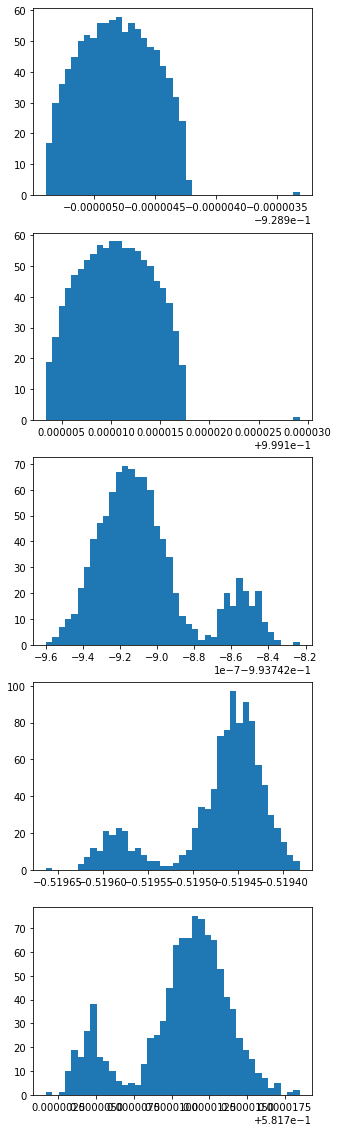

In [389]:
def F(A, layer_coeffs_functions, layer_coeffs_biases):
    layers = layer_coeffs_functions.shape[0]
    
    ret = np.array(A)
    for i in range(layers):
        #print('Layer', i + 1)
        #print('  |s| =', np.abs(s(ret)) / A.shape[0])
        #print('  ||ret|| =', np.max(np.abs(np.linalg.eigvalsh(ret))))
        #print()
        
        ret = (
            sum(layer_coeffs_functions[i, j] * functions[j](ret) for j in range(len(functions))) + 
            sum(layer_coeffs_biases[i, j] * biases[j](ret) for j in range(len(biases)))
        )
        #ret = np.maximum(0.0, ret)  # ReLU
        ret = np.tanh(0.1 * ret)  # Sigmoid
        # ret = proj_centered(ret)
        
    return ret


n = 1000

fig, axes = plt.subplots(5, 1, figsize=(5, 20))

for ax in axes:
    layers = 5
    coeffs_functions = np.random.normal(size=(layers, len(functions)))
    coeffs_biases = np.random.normal(size=(layers, len(functions)))
    
    # A = tkmath.linalg.random.goe(n)
    # A = tkmath.graphs.random.erdos_renyi(n, 0.5)
    A = tkmath.graphs.random.planted_clique(n, 0.5, int(5.0 * np.sqrt(n)))
    A = (2 * A - np.ones((n, n)) + np.eye(n)) / np.sqrt(n)

    ax.hist(np.linalg.eigvalsh(F(A, coeffs_functions, coeffs_biases)), bins=40)

In [390]:
layers = 5
coeffs_functions = np.random.normal(size=(layers, len(functions)))
coeffs_biases = np.random.normal(size=(layers, len(functions)))

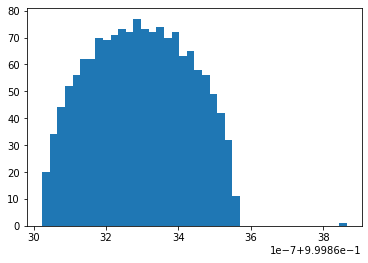

In [393]:
n = 1500

A = tkmath.graphs.random.planted_clique(n, 0.5, int(4.0 * np.sqrt(n)))
A = (2 * A - np.ones((n, n)) + np.eye(n)) / np.sqrt(n)

_ = plt.hist(np.linalg.eigvalsh(F(A, coeffs_functions, coeffs_biases)), bins=40)